In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import plot_tree, export_text
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, f1_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
%matplotlib inline

In [2]:
df = pd.read_csv("/content/Breast Cancer Data.csv")
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
499,91485,M,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,0.11210,...,30.76,163.20,1760.0,0.1464,0.3597,0.5179,0.21130,0.2480,0.08999,NaN
127,866203,M,19.00,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,...,25.73,148.20,1538.0,0.1021,0.2264,0.3207,0.12180,0.2841,0.06541,NaN
551,923780,B,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,...,28.26,77.80,436.6,0.1087,0.1782,0.1564,0.06413,0.3169,0.08032,NaN
10,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,NaN
242,883852,B,11.30,18.19,73.93,389.4,0.09592,0.13250,0.15480,0.02854,...,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.12180,0.3308,0.12970,NaN


In [3]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
df.replace('M', 1,inplace=True)
df.replace('B', 0,inplace=True)

In [6]:
df.drop('Unnamed: 32',axis='columns',inplace=True)

In [8]:
df.drop('id',axis='columns',inplace=True)

In [9]:
scl_cols = list(df.columns)
scl_cols

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [16]:
scaler = MinMaxScaler()

#FITTING THE DATA INTO THE SCALER
scaler.fit(df[scl_cols])

#TRANSFORMING THE SCALED DATA INTO THE NUMERIC COLUMNS
df[scl_cols] = scaler.transform(df[scl_cols])

In [27]:
input_cols = scl_cols
target_col = 'diagnosis'

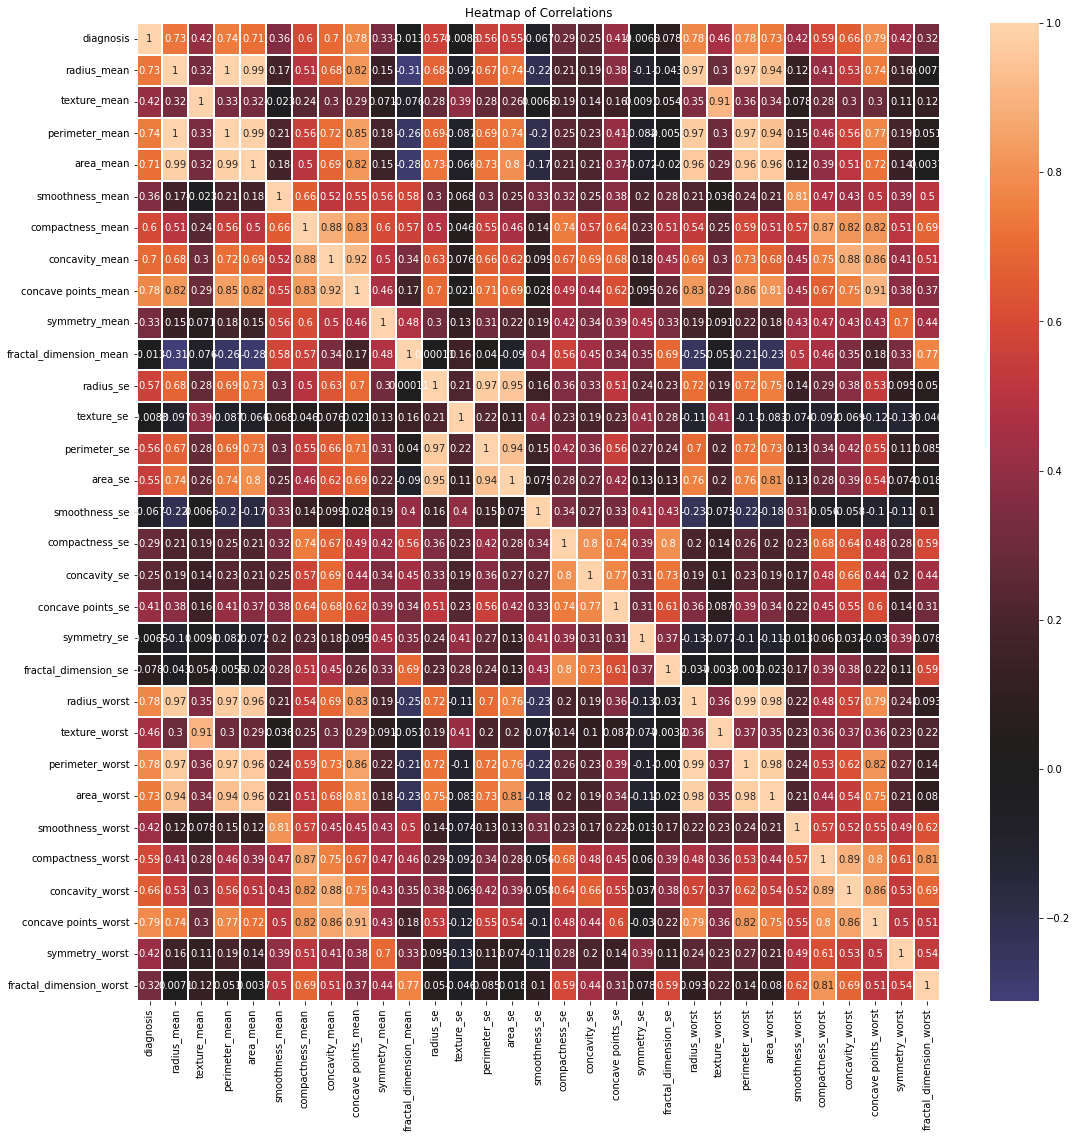

In [28]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), center=0, annot=True, linewidths=1);
plt.title('Heatmap of Correlations');

In [31]:
inputs = df[input_cols]
target = df[target_col].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.15,random_state=5)

In [33]:
def model_eval(model, X_train, y_train, X_test, y_test):
    
    #PREDICTIONS ON THE TRAINING INPUTS
    train_preds = model.predict(X_train)
    #TRAINING ACCURACY SCORE
    train_acc = accuracy_score(y_train, train_preds)
    
    #PREDICTIONS ON THE VALIDATION INPUTS
    test_preds = model.predict(X_test)
    #TEST ACCURACY SCORE
    test_acc = accuracy_score(y_test, test_preds)
    
    #PRINTING TRAINING AND TEST RMSEs
    print('Train ACC: {}, Validation ACC: {}'.format(train_acc, test_acc))

In [34]:
#DECLARING THE MODEL OBJECT
model = XGBClassifier(random_state=42)

#FITTING THE DATA INTO THE MODEL
model.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [35]:
model_eval(model, X_train, y_train, X_test, y_test)

Train ACC: 1.0, Validation ACC: 1.0
